# 1.모듈및 데이터 로드

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train

,index,label,px1,px2,px3,px4,px5,px6,px7,px8,...,px775,px776,px777,px778,px779,px780,px781,px782,px783,px784
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,59995,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,59996,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,59997,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,59998,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. EDA

0~9의 라벨당 몇개의 값이있는지 시각화  
이미지 데이터이기 때문에 이미지로 표현

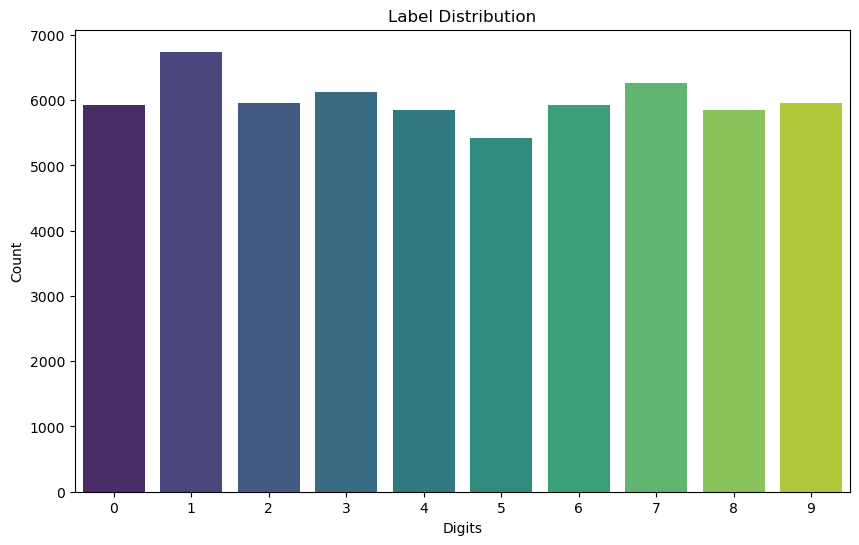

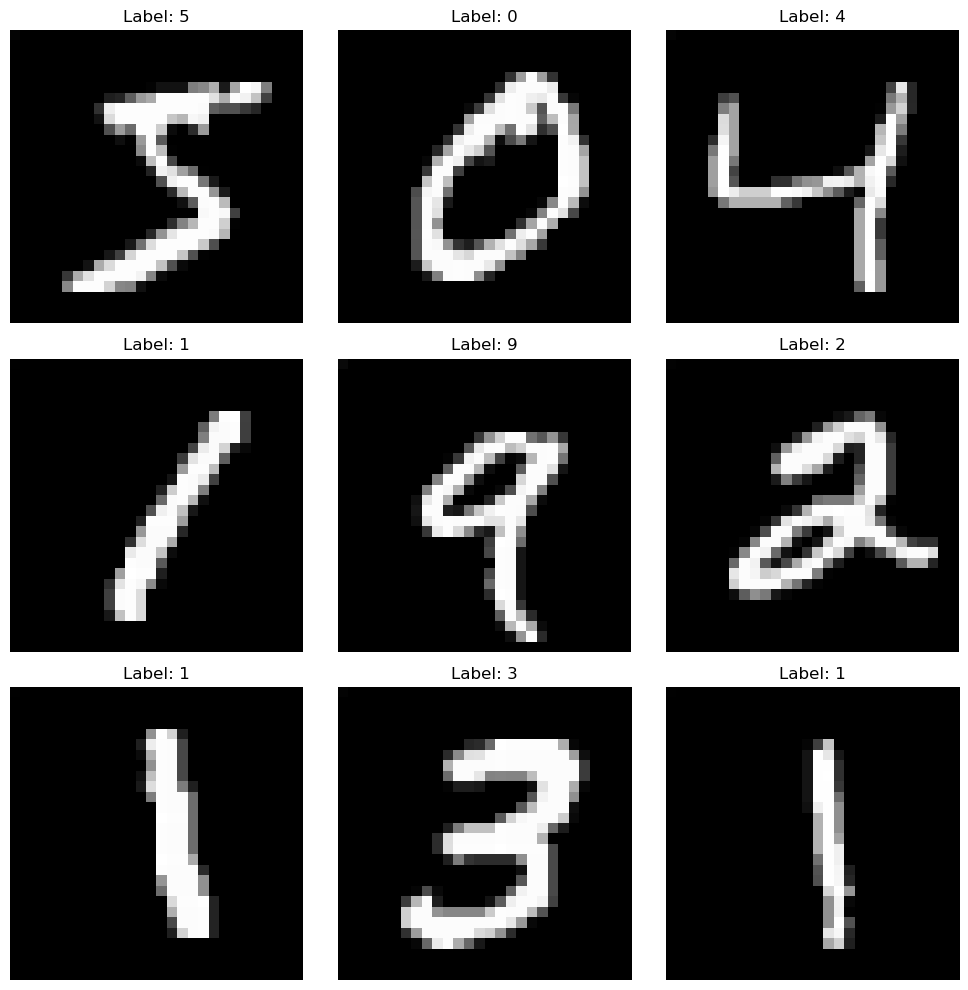

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 라벨 분포 확인
label_counts = train['label'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Label Distribution")
plt.xlabel("Digits")
plt.ylabel("Count")
plt.show()

# 9개의 이미지와 레이블 시각화
fig, axes = plt.subplots(3, 3, figsize=(10, 10))  # 3x3 서브플롯 생성
axes = axes.ravel()  # 2D 배열을 1D로 변환

for i in range(9):
    # i번째 데이터의 픽셀값과 레이블 가져오기
    pixels = train.iloc[i, 1:785].values.reshape(28, 28)  # 정확히 784개 픽셀값 선택
    label = train.iloc[i, 1]  # label 값 가져오기
    
    # 이미지와 레이블 출력
    axes[i].imshow(pixels, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()  # 레이아웃 조정
plt.show()


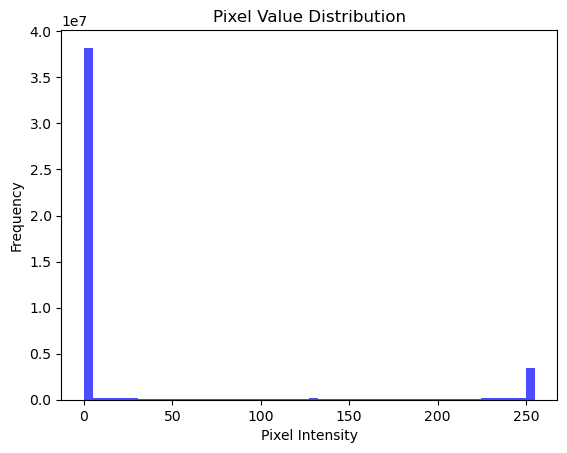

In [16]:
# 픽셀 값 분포 확인
pixels = train.iloc[:, 2:].values.flatten()
plt.hist(pixels, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


픽셀값의 분포가 일정하지 않아 정규화가 필요해 보임

# 3. 데이터  전처리

In [25]:
from sklearn.model_selection import train_test_split

# Feature와 라벨 분리
X = train.drop(columns=['label']).values
y = train['label'].values

# 정규화 (0~1로 스케일링)
X = X / 255.0

# 훈련 데이터와 검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 라벨 제거
X_train = X_train[:, 1:]  # 첫 번째 열(label) 제거
X_val = X_val[:, 1:]      # 동일하게 적용

# 2. 차원 변환
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# 결과 확인
print("Updated X_train shape:", X_train.shape)
print("Updated X_val shape:", X_val.shape)


Updated X_train shape: (48000, 28, 28, 1)
Updated X_val shape: (12000, 28, 28, 1)


# 4. 모델 선택 및 학습

기본적인 CNN모델 구현

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# 모델 정의
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 데이터 reshape (CNN 입력 형식에 맞게)
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# 학습
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=64)


C:\Users\j2982\Anaconda 3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.7863 - loss: 0.6572 - val_accuracy: 0.9774 - val_loss: 0.0750
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9618 - loss: 0.1273 - val_accuracy: 0.9852 - val_loss: 0.0530
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9716 - loss: 0.0950 - val_accuracy: 0.9868 - val_loss: 0.0456
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9771 - loss: 0.0766 - val_accuracy: 0.9874 - val_loss: 0.0434
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9791 - loss: 0.0683 - val_accuracy: 0.9897 - val_loss: 0.0356
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9805 - loss: 0.0627 - val_accuracy: 0.9909 - val_loss: 0.0331
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9827 - loss: 0.0566 - val_accuracy: 0.9903 - val_loss: 0.0306
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 47ms/step - accuracy: 0.9847 - loss: 0.0518 - 

# 5. 검증 및 테스트

In [30]:
# 테스트 데이터 크기 확인
print("test_data shape before processing:", test_data.shape)
test_data = test_data[:, 1:]  # 첫 번째 열 제거

# 정규화 및 차원 변환
test_data = test_data.reshape(-1, 28, 28, 1)  # 28x28x1로 변환
print("test_data shape after processing:", test_data.shape)


test_data shape before processing: (10000, 785)
test_data shape after processing: (10000, 28, 28, 1)


In [32]:
# 검증 데이터 성능
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

# 테스트 데이터 로드 및 처리
test_data = pd.read_csv('data/test.csv').values / 255.0
test_data = test_data[:, 1:]  # 첫 번째 열 제거
test_data = test_data.reshape(-1, 28, 28, 1)

# 예측
predictions = model.predict(test_data)
predicted_labels = predictions.argmax(axis=1)


375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9917 - loss: 0.0272
Validation Loss: 0.028159502893686295, Validation Accuracy: 0.9913333058357239
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


# 6. 결과 제출

In [33]:
submission = pd.DataFrame({
    "index": range(len(predicted_labels)),
    "label": predicted_labels
})

submission.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
